In [57]:
# Kaggle Mohs Regression Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler


In [147]:
full_train = pd.read_csv('train.csv')
full_test = pd.read_csv('test.csv')

In [59]:
full_train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


## Features

id: Unique sample identifier<br>
allelectrons_Total: Total number of electrons in the compound<br> 
allelectrons_Average: Average number of electrons present in the sample<br>
density_Total: Total density of the sample *(kg/m<sup>3</sup>)*<br>
density_Average': Average elemental density *(kg/m<sup>3</sup>)*<br>
R_vdw_element_Average: Van der Waals Radius - half distance between like atoms that are non-bonded *(m)*<br>
R_cov_element_Average: Covelant Bond Radius - half distance between like atomic nuclei that are covelantly bonded *(m)*<br>
val_e_Average: Average number of valence outer shell electrons <br>
atomicweight_Average: Average Atomic Weight of the sample compound<br> 
ionenergy_Average: Average first ionization energy - to bump a valence electron into the next shell<br>
el_neg_chi_Average: Pauling electronegativity of the most common oxidation state (changes with transition metal-containing compounds)<br>
zaratio_Average: The ratio of electron density to bulk density, determined by the average atomic number / average atomic weight<br>
Hardness: Mohs Hardness rating

In [60]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [61]:
full_train.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

The id is an int value and will be dropped from the training data. All others are non-null floats, and there are no nulls present in the dataset. Next look for dupes.

In [62]:
full_train.drop(['id'], axis=1)
dupes = full_train[full_train.duplicated()]

print(f' There are {len(dupes)} duplicates in the dataset')

 There are 0 duplicates in the dataset


In [63]:
len(full_train)

10407

Now to look at the minima and maxima

In [64]:
full_train.max()

id                       10406.000000
allelectrons_Total       15300.000000
density_Total              643.093804
allelectrons_Average        67.000000
val_e_Average                6.000000
atomicweight_Average       167.400000
ionenergy_Average           15.245810
el_neg_chi_Average           3.443000
R_vdw_element_Average        2.250000
R_cov_element_Average        1.615840
zaratio_Average              0.825990
density_Average             10.970000
Hardness                    10.000000
dtype: float64

In [65]:
full_train.min()

id                       0.0
allelectrons_Total       0.0
density_Total            0.0
allelectrons_Average     0.0
val_e_Average            0.0
atomicweight_Average     0.0
ionenergy_Average        0.0
el_neg_chi_Average       0.0
R_vdw_element_Average    0.0
R_cov_element_Average    0.0
zaratio_Average          0.0
density_Average          0.0
Hardness                 1.0
dtype: float64

### Problem!!!!

This is a problem. The only features with proper values are the ID and Hardness. The lowest possible hardness is 1, and there is a possible ID of 0. 

All other features must have non-zero values for the compound to exist!!!!

In [66]:
elec_tot = (full_train[full_train.allelectrons_Total == 0])
den_tot = (full_train[full_train.density_Total == 0])
elec_avg = (full_train[full_train.allelectrons_Average == 0])
val_e_avg = (full_train[full_train.val_e_Average == 0])
weight_avg = (full_train[full_train.atomicweight_Average == 0])
ion_avg = (full_train[full_train.ionenergy_Average == 0])
chi_avg = (full_train[full_train.el_neg_chi_Average == 0])
vdw = (full_train[full_train.R_vdw_element_Average == 0])
cov = (full_train[full_train.R_cov_element_Average == 0])
zaratio = (full_train[full_train.zaratio_Average == 0])
den_avg = (full_train[full_train.density_Average == 0])

print([len(elec_tot), len(den_tot), len(elec_avg), len(val_e_avg), len(weight_avg), len(ion_avg), len(chi_avg), len(vdw), len(cov), len(zaratio), len(den_avg)])


[76, 54, 76, 71, 77, 73, 67, 68, 77, 62, 56]


In [67]:
weight_avg

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
22,22,0.0,0.755433,0.0,0.0,0.0,0.000000,0.000,0.000,0.0,0.000000,0.80454,2.5
99,99,42.0,0.000000,0.0,4.0,0.0,0.026725,2.727,1.767,0.0,0.000000,0.80212,6.0
524,524,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000,0.0,0.000000,0.50633,1.5
584,584,0.0,0.000000,0.0,0.0,0.0,0.000000,1.990,2.015,0.0,0.000000,0.00000,1.5
751,751,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000,0.0,0.000000,0.91248,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,10099,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000,0.0,0.499010,0.77755,6.0
10153,10153,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,1.500,0.0,0.000000,0.00000,1.5
10242,10242,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000,0.0,0.000000,0.82753,1.5
10321,10321,0.0,0.505992,0.0,0.0,0.0,0.000000,0.000,0.000,0.0,0.499404,0.01079,6.5


The atomicweight_Average had the most rows with 0.0 values, so I'm going to start by removing these rows. As can be seen above, many of the other columns also contain zeros, so removing by the non-existent atomic weights will reduce these problematic values

In [68]:
clean_train = full_train.loc[full_train.atomicweight_Average > 0.0]

In [69]:
clean_train.min()

id                       0.000000
allelectrons_Total       0.001000
density_Total            0.000000
allelectrons_Average     0.001000
val_e_Average            1.333333
atomicweight_Average     0.001000
ionenergy_Average        0.000167
el_neg_chi_Average       0.000000
R_vdw_element_Average    0.000000
R_cov_element_Average    0.000000
zaratio_Average          0.000000
density_Average          0.000000
Hardness                 1.000000
dtype: float64

We still have zero values, and the all_electrons total is suspicious with a value less than 1.
Minimum atomic weight must be 1.008, which is the weight of Hydrogen, which is nonsolid.  

In [70]:
clean_train = full_train.loc[(full_train.atomicweight_Average > 1.0) & (full_train.allelectrons_Total > 1.0)]

In [71]:
clean_train.min()

id                       0.000000
allelectrons_Total       1.900000
density_Total            0.000000
allelectrons_Average     4.040404
val_e_Average            1.333333
atomicweight_Average     6.876747
ionenergy_Average        0.000167
el_neg_chi_Average       0.000000
R_vdw_element_Average    0.000000
R_cov_element_Average    0.000000
zaratio_Average          0.000000
density_Average          0.000000
Hardness                 1.000000
dtype: float64

There are still values where the total density is 0. Let's look at that.

In [72]:
clean_train[clean_train.density_Total == 0.0]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
3276,3276,4.0,0.0,4.666667,3.0,8.773227,13.51252,0.0,0.0,0.0,0.0,0.0,3.5


This can be removed

In [73]:
clean_train = clean_train.loc[clean_train.density_Total > 0.0]

In [74]:
clean_train.min()

id                       0.000000
allelectrons_Total       1.900000
density_Total            0.001000
allelectrons_Average     4.040404
val_e_Average            1.333333
atomicweight_Average     6.876747
ionenergy_Average        0.000167
el_neg_chi_Average       1.622865
R_vdw_element_Average    1.028000
R_cov_element_Average    0.000000
zaratio_Average          0.401635
density_Average          0.000000
Hardness                 1.000000
dtype: float64

There is somehow an average density of 0.0, even though we have recorded total densities...

In [75]:
len(clean_train[clean_train.density_Average == 0])

39

In [76]:
clean_train[clean_train.density_Average == 0]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
272,272,198.0,9.148824,4.814815,3.459459,8.462067,13.266033,2.065000,1.394000,0.574595,0.770755,0.0,2.0
390,390,40.0,1.743160,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.0,5.0
808,808,43.0,7.876748,7.500000,4.000000,14.996860,12.184250,2.727500,1.545000,0.710000,0.614430,0.0,5.3
896,896,58.0,4.542664,15.666667,4.666667,36.871575,11.354767,1.976667,2.006667,0.920000,0.486507,0.0,5.5
958,958,36.0,7.876748,18.000000,3.750000,37.272150,12.184250,2.727500,1.545000,0.710000,0.614430,0.0,4.0
1341,1341,38.0,2.332664,5.666667,3.000000,8.773227,13.162967,2.216667,1.336667,0.728000,0.556623,0.0,3.3
1518,1518,88.0,7.143328,11.142857,4.571429,22.594280,10.967771,2.600000,1.744286,0.914286,0.481661,0.0,7.8
2600,2600,58.0,8.147992,11.600000,4.800000,24.808518,11.023840,2.644000,1.794000,0.960000,0.499514,0.0,6.0
2620,2620,46.0,1.740168,5.750000,3.916667,11.990560,12.714558,2.770000,1.446667,0.620833,0.661224,0.0,4.0
3066,3066,6.0,0.001000,6.000000,3.500000,11.663548,12.200040,2.550000,1.542000,0.703000,0.499540,0.0,3.0


There are 39 values here, but the other data are nonzero, so I'm more inclined to remove the average density as a feature than to remove these rows. 
Another suspicious value are the denisty_Total = 0.00100.  It seems odd that there are more than 1 value with the exact same measure with that kind of precision. 

I want to see what else still has 0.0 values first.

In [77]:
clean_train.min()

id                       0.000000
allelectrons_Total       1.900000
density_Total            0.001000
allelectrons_Average     4.040404
val_e_Average            1.333333
atomicweight_Average     6.876747
ionenergy_Average        0.000167
el_neg_chi_Average       1.622865
R_vdw_element_Average    1.028000
R_cov_element_Average    0.000000
zaratio_Average          0.401635
density_Average          0.000000
Hardness                 1.000000
dtype: float64

In [78]:
clean_train[clean_train.R_cov_element_Average == 0]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
10237,10237,30.0,4.542664,11.0,4.666667,22.521872,12.39211,2.766667,1.625,0.0,0.499074,1.02048,4.8


There is only 1 material that has a 0.0 covalent bond average. Chemically, this is possible since the material may be solely ionic bonds, such as NaCl. NaCl would be all ionic bonds and van der Waals forces, so I am not going to remove this datum. 

In [79]:
clean_train[clean_train.density_Total <= 0.1]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
3066,3066,6.0,0.001,6.000000,3.5,11.663548,12.200040,2.550000,1.542,0.703,0.499540,0.0,3.0
7740,7740,36.0,0.001,18.000000,4.0,36.068500,8.236600,1.790000,2.055,1.390,0.499000,0.0,3.0
9542,9542,14.0,0.001,4.666667,4.0,8.773227,8.351667,1.903333,1.310,1.500,0.401635,0.0,4.0


These 3 values have the same exact density_Total and a 0.0 density_Average, all with different numbers of electrons and weights. They are also the only three that are non-zero that have a density below 0.13, and it is 100 fold lower, so I am inclined to believe that this was entered erroneously, and thus these should be removed. 

In [80]:
clean_train = clean_train.loc[clean_train.density_Total > 0.1]

In [81]:
clean_train.min()

id                       0.000000
allelectrons_Total       1.900000
density_Total            0.133873
allelectrons_Average     4.040404
val_e_Average            1.333333
atomicweight_Average     6.876747
ionenergy_Average        0.000167
el_neg_chi_Average       1.622865
R_vdw_element_Average    1.028000
R_cov_element_Average    0.000000
zaratio_Average          0.401635
density_Average          0.000000
Hardness                 1.000000
dtype: float64

Finally, we will remove the column for density_Average.

In [82]:
clean_train.drop('density_Average', axis=1, inplace=True)

In [83]:
clean_train.min()

id                       0.000000
allelectrons_Total       1.900000
density_Total            0.133873
allelectrons_Average     4.040404
val_e_Average            1.333333
atomicweight_Average     6.876747
ionenergy_Average        0.000167
el_neg_chi_Average       1.622865
R_vdw_element_Average    1.028000
R_cov_element_Average    0.000000
zaratio_Average          0.401635
Hardness                 1.000000
dtype: float64

# Distributions

Let's look at the distributions: 

array([[<AxesSubplot:title={'center':'allelectrons_Total'}>,
        <AxesSubplot:title={'center':'density_Total'}>,
        <AxesSubplot:title={'center':'allelectrons_Average'}>],
       [<AxesSubplot:title={'center':'val_e_Average'}>,
        <AxesSubplot:title={'center':'atomicweight_Average'}>,
        <AxesSubplot:title={'center':'ionenergy_Average'}>],
       [<AxesSubplot:title={'center':'el_neg_chi_Average'}>,
        <AxesSubplot:title={'center':'R_vdw_element_Average'}>,
        <AxesSubplot:title={'center':'R_cov_element_Average'}>],
       [<AxesSubplot:title={'center':'zaratio_Average'}>,
        <AxesSubplot:title={'center':'Hardness'}>, <AxesSubplot:>]],
      dtype=object)

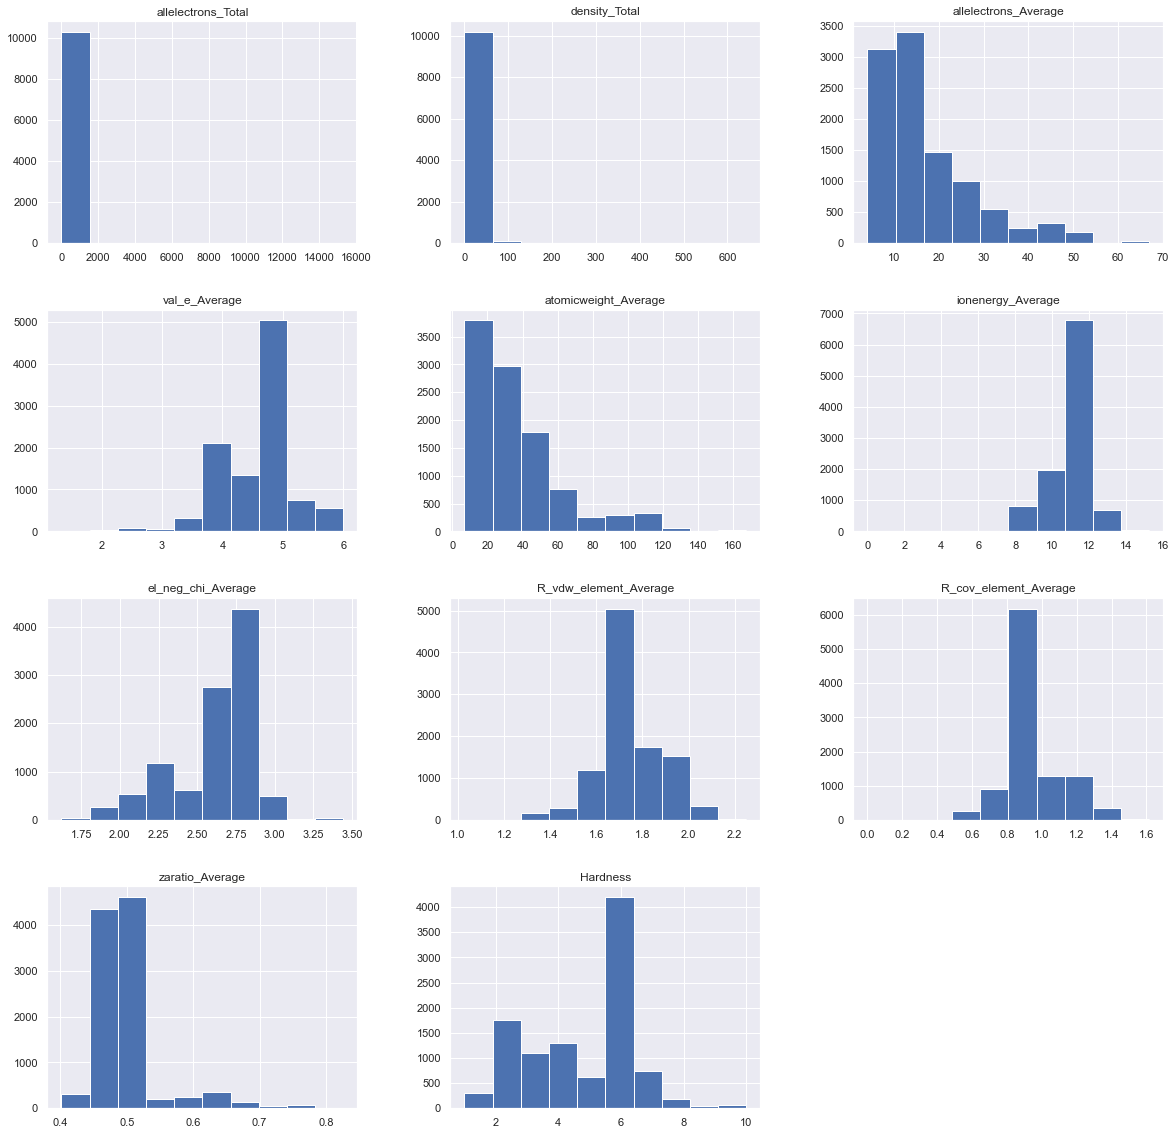

In [84]:
sns.set(rc={'figure.figsize': (20,20)})
clean_train.drop(['id'], axis=1).hist()

I want to see the distribution of the allelectrons_total and the density_Total above the lowest bin. 

In [85]:
len(clean_train.loc[clean_train.allelectrons_Total > 500])

225

I'm looking to see where I can cutoff the upper limit while losing less than 1% of the original data.

In [86]:
len(clean_train.loc[clean_train.allelectrons_Total > 725])/len(clean_train.allelectrons_Total)

0.00979156568104702

The density_Total distribution also looks very skewed. Since I've removed some data at this point, I want to look back at the density_Total greater than 200 from the original data.  

In [87]:
full_train.loc[full_train.density_Total > 200]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
3072,3072,2024.2,236.459656,48.172299,2.681514,114.951853,7.146097,1.622865,2.209848,1.615840,0.434283,0.45291,4.7
4002,4002,266.0,236.459656,25.586207,3.172414,55.617414,9.028634,2.168276,1.906207,1.164138,0.469938,2.48360,2.5
5493,5493,15300.0,643.093804,8.027397,5.401274,16.215127,12.976603,3.179236,1.567945,0.737260,0.505030,0.58105,1.5
8173,8173,790.0,236.459656,39.500000,5.200000,93.784450,9.273855,2.279000,1.907000,1.214500,0.457149,5.10922,2.8


Three of the densities are the exact same, at 236.459656, which is highly unprobable given different values for everything else. The last is over 600, which also has an outlier in the allelectrons_Total, which will already be removed. 

From the allelectrons_Total, there are only 9 values that exceed 2000, and 18 values that exceed 1000. Again, there are is a suspicious finding with 6 of those having the exact total number of electrons. I want to see the histogram of the distribution without the values above 1000. To keep 99% of the original data, I can remove values above 725 total electrons. This still has a strong right skew, so I'll have to do something to transform that to something closer to a normal distribution. 

In [88]:
clean_train = clean_train[clean_train.allelectrons_Total < 725]

In [89]:
clean_train.loc[clean_train.density_Total > 150]

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,Hardness
1858,1858,237.0,160.284000,20.500000,4.172414,47.315423,9.206167,2.168276,1.935172,1.164138,0.483284,4.0
4002,4002,266.0,236.459656,25.586207,3.172414,55.617414,9.028634,2.168276,1.906207,1.164138,0.469938,2.5
8995,8995,515.0,178.742000,41.000000,3.750000,93.784450,9.061100,1.980000,2.045000,1.360000,0.426680,2.5


Since this is the only remaining of the spurious density totals, I'm going to remove it by keeping only density totals less than 200.

In [90]:
clean_train = clean_train.loc[clean_train.density_Total < 200]

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'allelectrons_Total'}>,
        <AxesSubplot:title={'center':'density_Total'}>],
       [<AxesSubplot:title={'center':'allelectrons_Average'}>,
        <AxesSubplot:title={'center':'val_e_Average'}>,
        <AxesSubplot:title={'center':'atomicweight_Average'}>],
       [<AxesSubplot:title={'center':'ionenergy_Average'}>,
        <AxesSubplot:title={'center':'el_neg_chi_Average'}>,
        <AxesSubplot:title={'center':'R_vdw_element_Average'}>],
       [<AxesSubplot:title={'center':'R_cov_element_Average'}>,
        <AxesSubplot:title={'center':'zaratio_Average'}>,
        <AxesSubplot:title={'center':'Hardness'}>]], dtype=object)

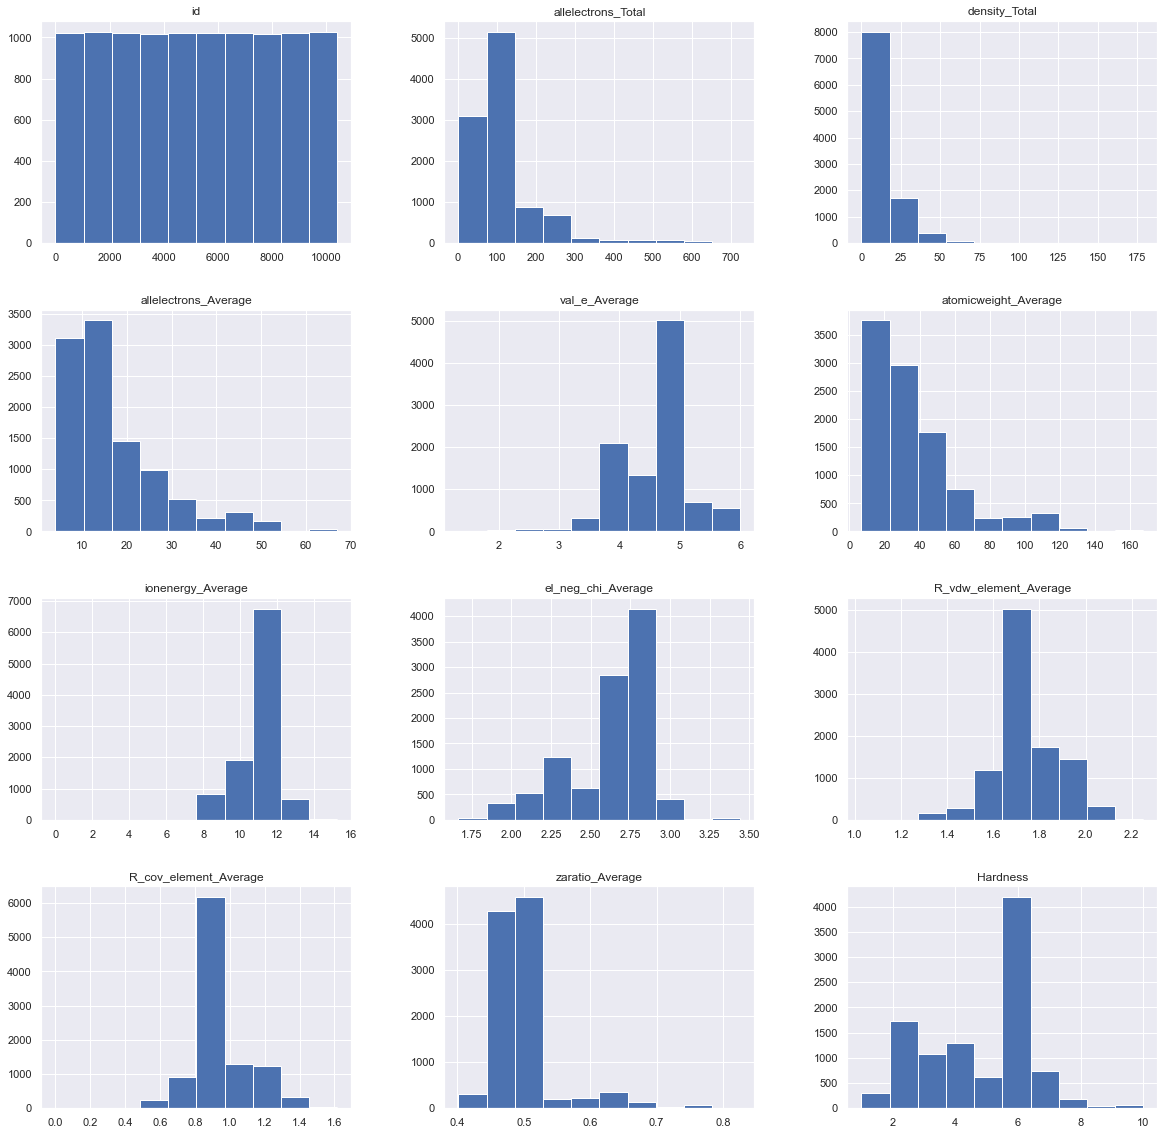

In [91]:
clean_train.hist()

At this point, we have a Right Skew on the following: 
- allelectrons_Total
- density_Total
- allelectrons_Average
- atomicweight_Average

We know that the density and atomic weight are directly proportional, whereas the the cube of the radii are proportional to the density and weight. Since the radii appear to be in a more normal distribution, I'd like to take the cubic root of the density and weight to see how that affects the histograms. 

<AxesSubplot:>

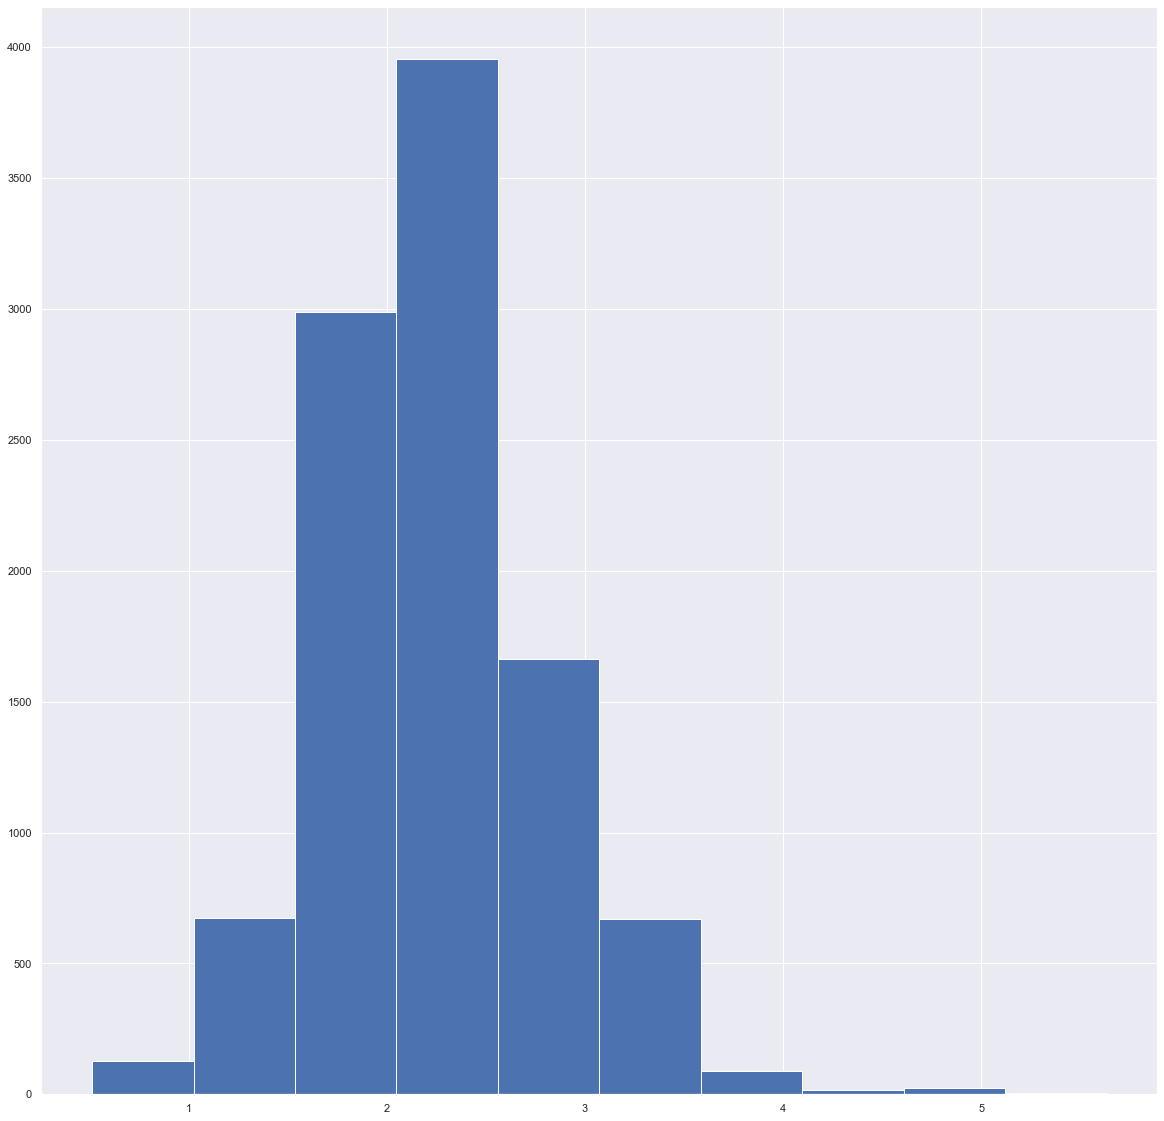

In [92]:
# Apply cubic root to transform the density

density_transform = clean_train['density_Total'].apply(lambda x: x**(1/3))
density_transform.hist()

<AxesSubplot:>

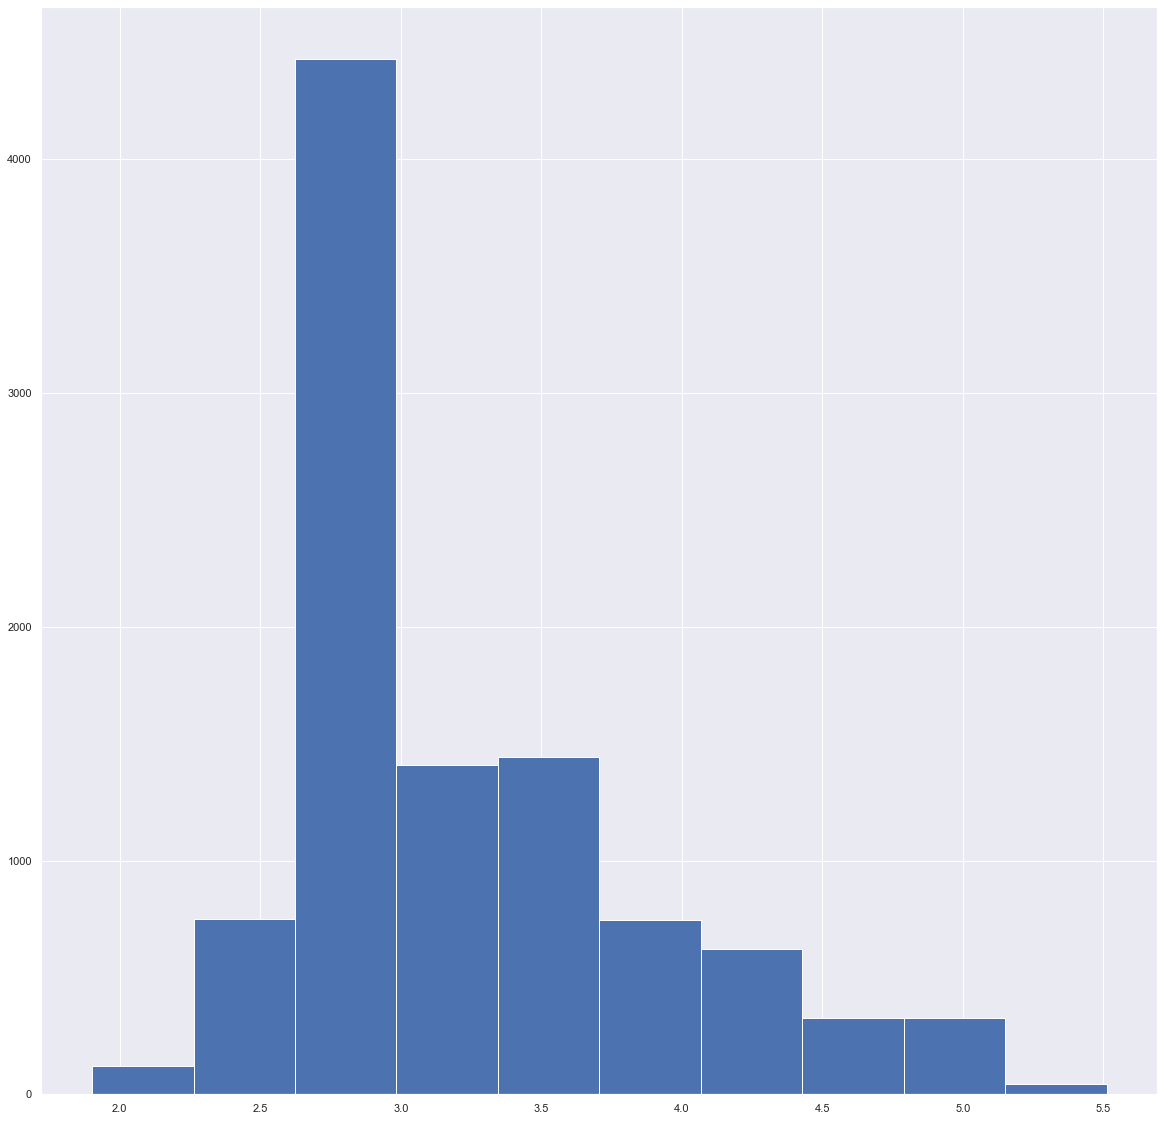

In [93]:

weight_transform = clean_train['atomicweight_Average'].apply(lambda x: x**(1/3))
weight_transform.hist()

Since the electron number is also directly proportion with the atomic weight, I'm going to perform the same transform on these: 

<AxesSubplot:>

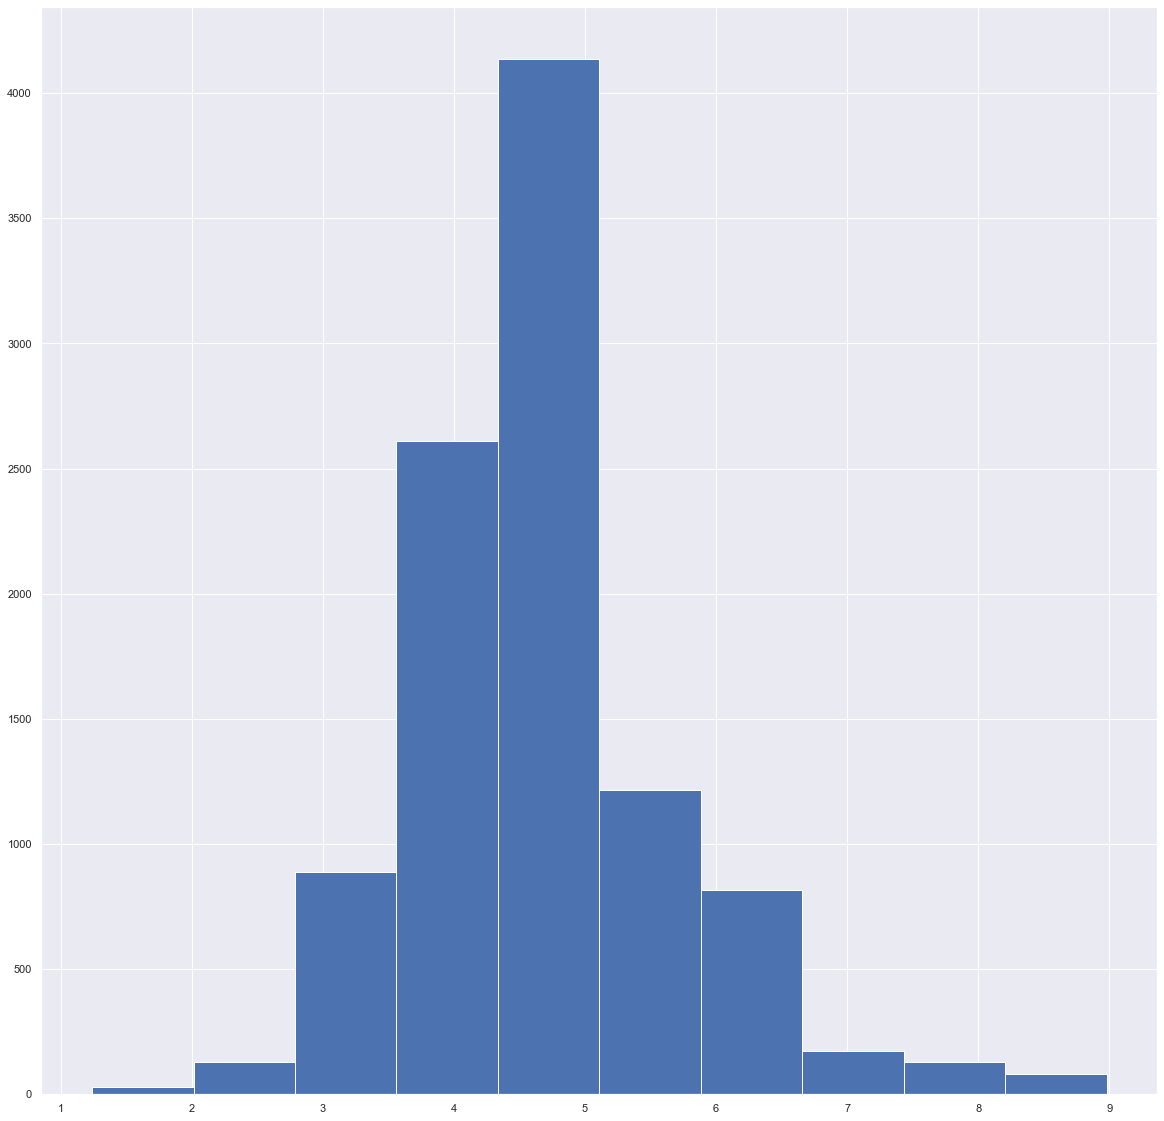

In [94]:
# electron total Distribution

etotal_transform = clean_train['allelectrons_Total'].apply(lambda x: x**(1/3))
etotal_transform.hist()

<AxesSubplot:>

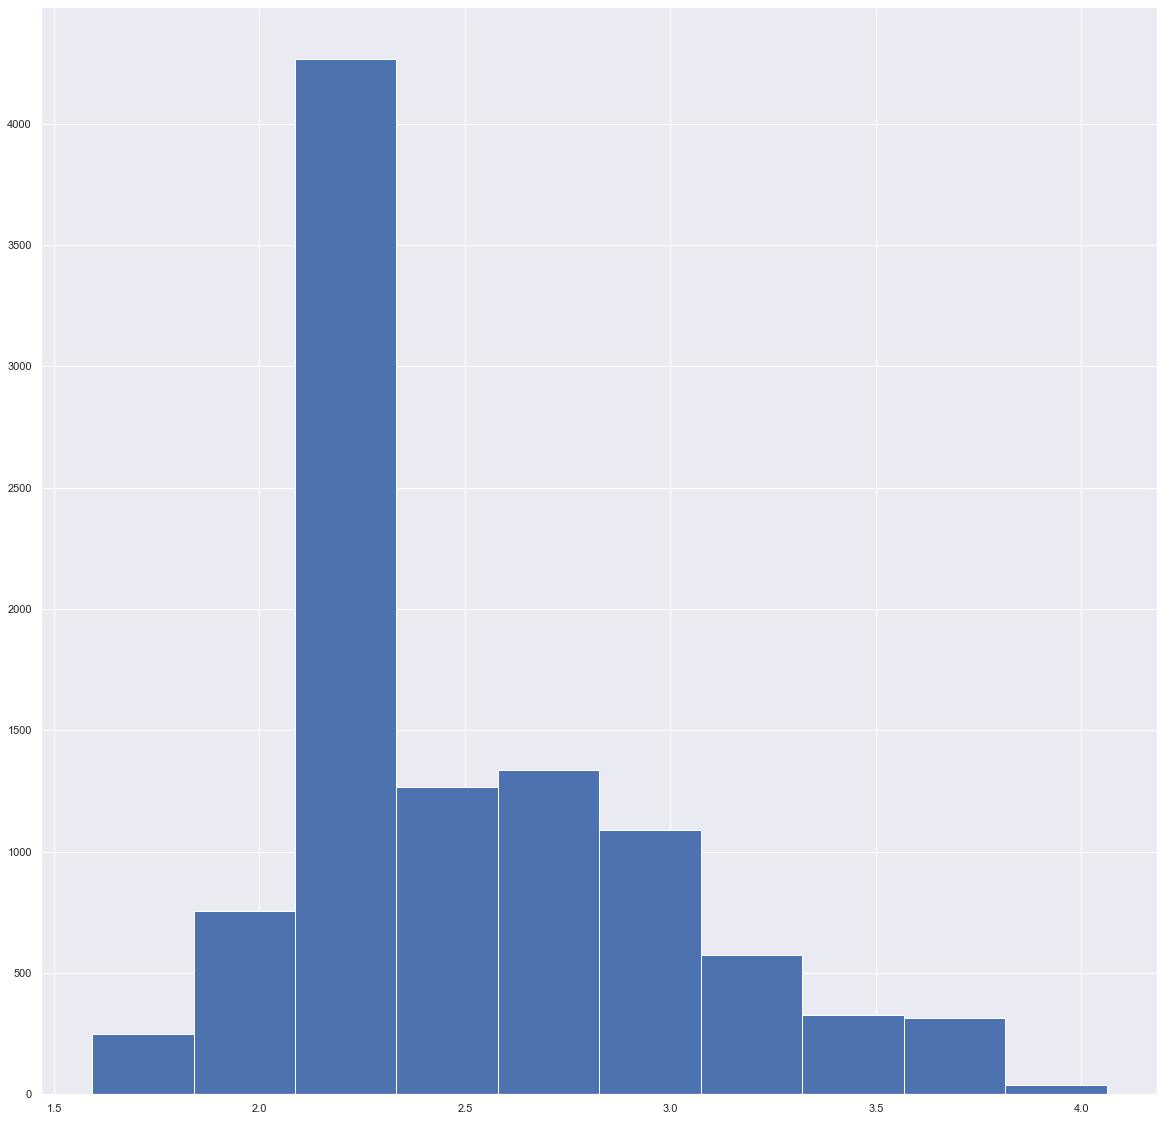

In [95]:
# electron average Distribution

eavg_transform = clean_train['allelectrons_Average'].apply(lambda x: x**(1/3))
eavg_transform.hist()

array([[<AxesSubplot:title={'center':'allelectrons_Total'}>,
        <AxesSubplot:title={'center':'allelectrons_Average'}>],
       [<AxesSubplot:title={'center':'atomicweight_Average'}>,
        <AxesSubplot:title={'center':'density_Total'}>]], dtype=object)

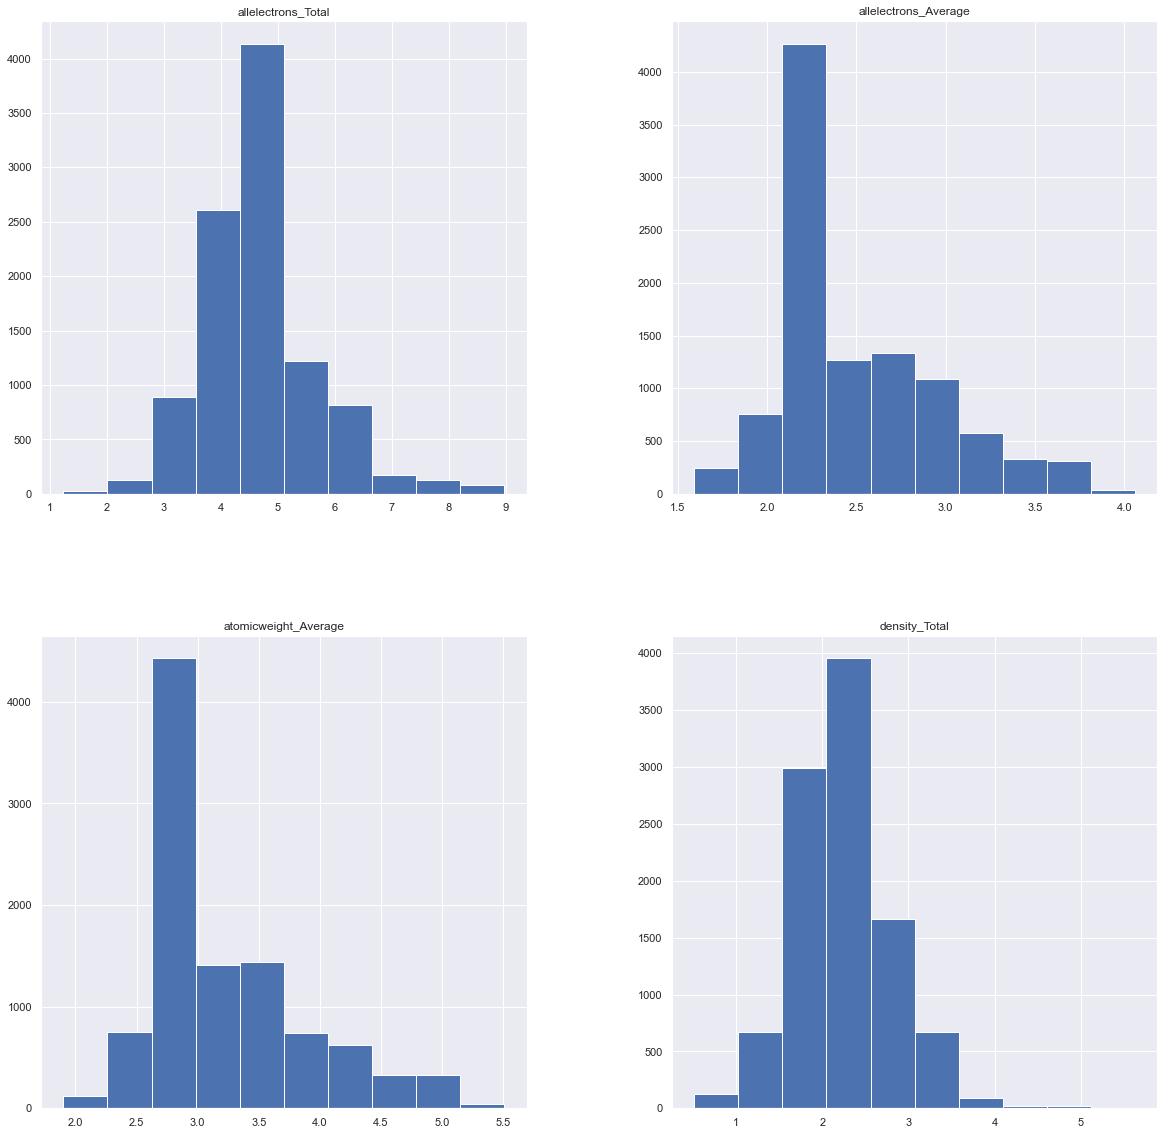

In [96]:
# electron total Distribution

cubicroot_transforms = clean_train[['allelectrons_Total', 'allelectrons_Average', 'atomicweight_Average', 'density_Total']].apply(lambda x: x**(1/3))
cubicroot_transforms.hist()

In [97]:
transforms = clean_train.copy(deep=True)

In [98]:
transforms.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,6.0


In [99]:
atomicmass_Average = transforms.atomicweight_Average * transforms.zaratio_Average

In [100]:
transforms['atomicnumber_Average'] = transforms.atomicweight_Average * transforms.zaratio_Average

In [101]:
transforms.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,Hardness,atomicnumber_Average
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,6.0,10.225256
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,6.5,10.001650
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,2.5,16.244710
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,6.0,9.889826
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,6.0,12.312553


In [102]:
transforms[['allelectrons_Total_T', 'allelectrons_Average_T', 'atomicweight_Average_T', 'atomicnumber_Average_T', 'density_Total_T']] = transforms[['allelectrons_Total', 'allelectrons_Average', 'atomicweight_Average', 'atomicnumber_Average', 'density_Total']].apply(lambda x: x**(1/3))

- The Z/A-Ratio, is the ratio fo electron density to the bulk density - determined by the average atomic number / average atomic weight. We don't actually have the average Atomic Number, which should correlate with the allelectrons_Average. We can determine the Atomic Number average based on the Z/A value multiplied by the atomicweight_Average. 


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'allelectrons_Total'}>,
        <AxesSubplot:title={'center':'density_Total'}>,
        <AxesSubplot:title={'center':'allelectrons_Average'}>],
       [<AxesSubplot:title={'center':'val_e_Average'}>,
        <AxesSubplot:title={'center':'atomicweight_Average'}>,
        <AxesSubplot:title={'center':'ionenergy_Average'}>,
        <AxesSubplot:title={'center':'el_neg_chi_Average'}>],
       [<AxesSubplot:title={'center':'R_vdw_element_Average'}>,
        <AxesSubplot:title={'center':'R_cov_element_Average'}>,
        <AxesSubplot:title={'center':'zaratio_Average'}>,
        <AxesSubplot:title={'center':'Hardness'}>],
       [<AxesSubplot:title={'center':'atomicnumber_Average'}>,
        <AxesSubplot:title={'center':'allelectrons_Total_T'}>,
        <AxesSubplot:title={'center':'allelectrons_Average_T'}>,
        <AxesSubplot:title={'center':'atomicweight_Average_T'}>],
       [<AxesSubplot:title={'center':'

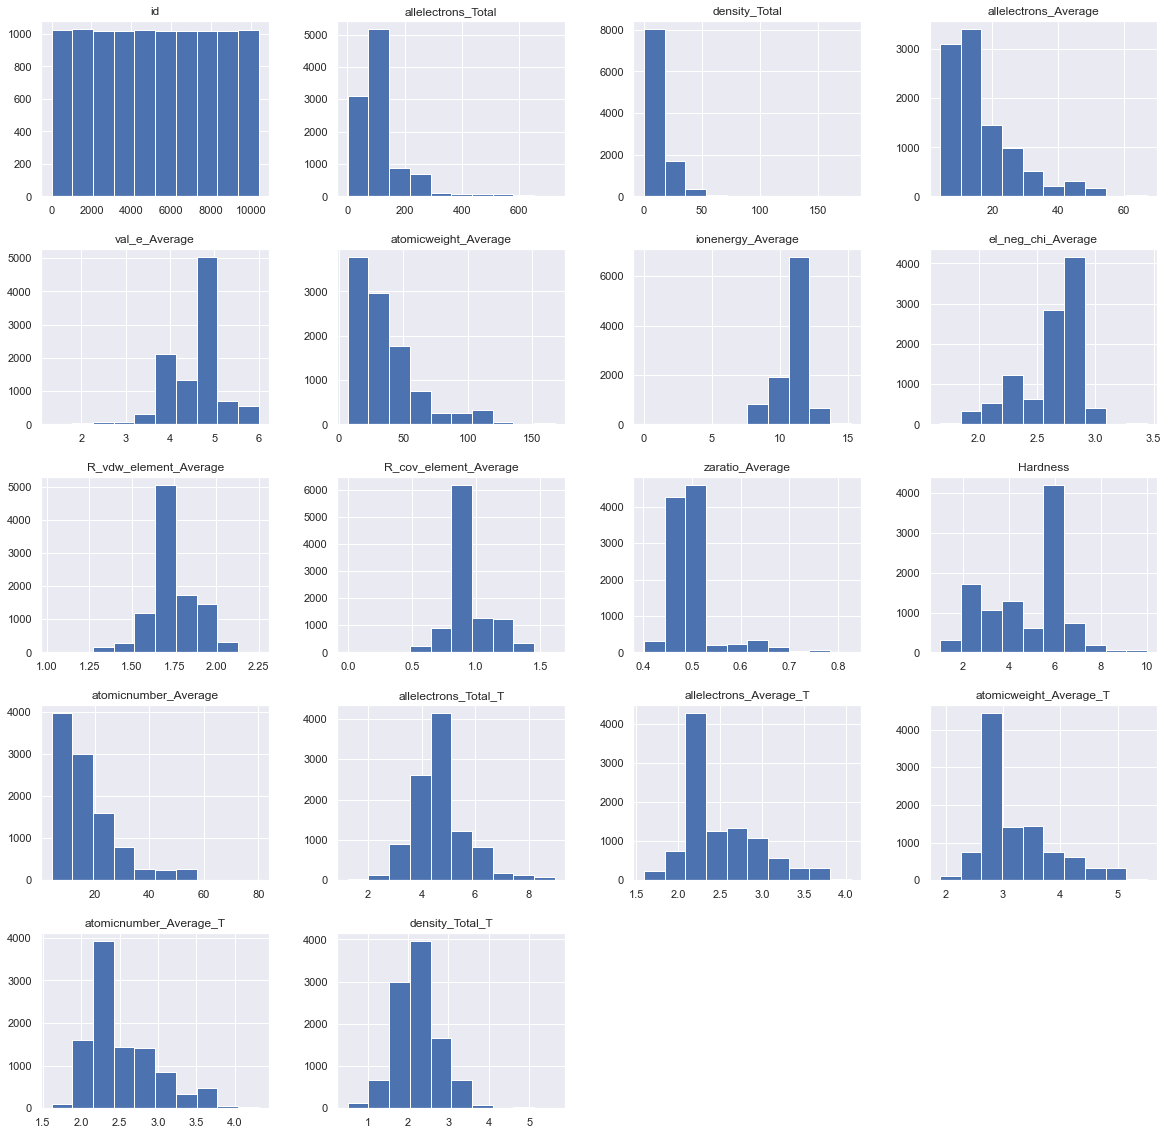

In [103]:
transforms.hist()

Now that we've verified that the transforms were done properly, we can remove the original non-transformed columns from the df.

In [104]:
transforms.drop(['allelectrons_Total', 'allelectrons_Average', 'atomicweight_Average', 'density_Total', 'atomicnumber_Average'], axis=1, inplace=True)

In [105]:
transforms.head()

,id,val_e_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,Hardness,allelectrons_Total_T,allelectrons_Average_T,atomicweight_Average_T,atomicnumber_Average_T,density_Total_T
0,0,4.8,11.08810,2.766,1.732,0.860,0.496070,6.0,4.641589,2.154435,2.741850,2.170491,0.944142
1,1,4.8,12.04083,2.755,1.631,0.910,0.492719,6.5,4.641589,2.154435,2.727873,2.154553,1.962509
2,2,5.6,12.08630,2.828,1.788,0.864,0.481478,2.5,4.235824,2.498666,3.231309,2.532624,2.071263
3,3,4.8,10.94850,2.648,1.626,0.936,0.489272,6.0,4.641589,2.154435,2.724035,2.146493,2.064192
4,4,4.8,11.82448,2.766,1.682,0.896,0.492736,6.0,4.876999,2.263702,2.923555,2.309135,2.123692




***
## Look at the correlations

In [106]:
def heatmap(dataset, label = None):
    columns = list(dataset)
    corr = dataset.corr()
    plt.figure(figsize = (14, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'crest', annot = True, linewidths = .1)
    #plt.yticks(range(len(columns)), columns, fontsize = 5)
    #plt.xticks(range(len(columns)), columns, fontsize = 5)
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()

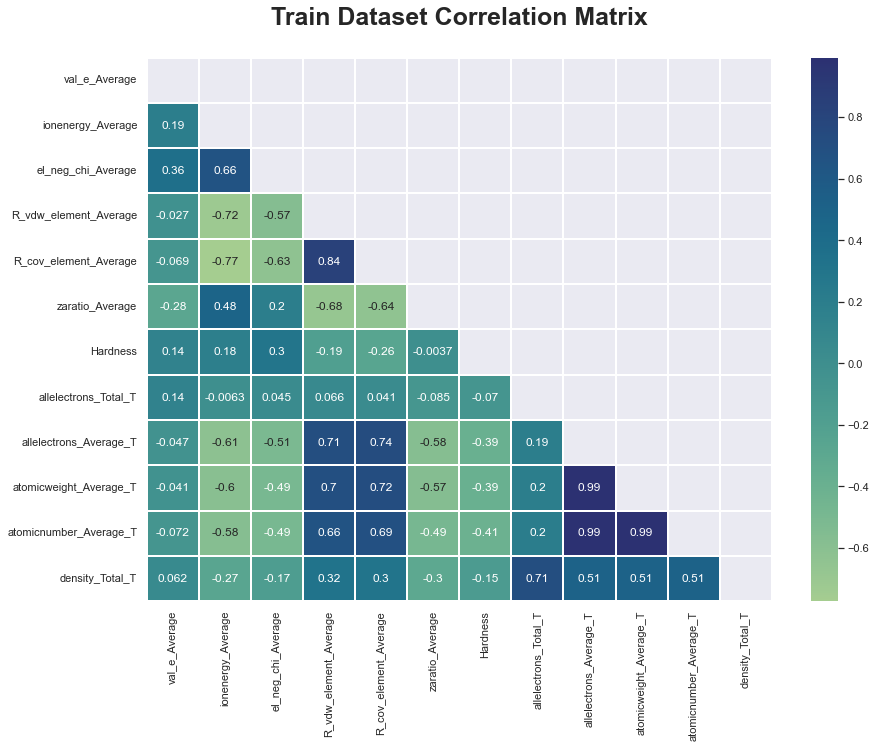

In [107]:
heatmap(transforms.drop(['id'], axis=1), 'Train')

- It should be noted that, not surprisingly, there is a very strong correlation with the atomic weight and number of electrons. 
- The atomic weight is based on the number of protons and neutrons in a molecule, and while the neutrons have some flexibility, the electrons do not - they are directly correlated with the number of protons. That being said, keeping both of these measures may not be ideal. 
- We also see similar correlation values between the allelectrons total and density total AND the allelectrons_average and density_average.

- The Z/A Ratio represents the electron cloud density, determined by the average molecular number / average molecular weight


- Another correlation that appears is between the Van der Waals forces and Covelant forces
    - Covelant radius is half the internuclear separation begween the nuclei of two single-bonded atoms of the SAME species (homonuclear)
    - van der Waals radius is half the distance between the closest approach of two non-bonded atoms of a given element

Though these forces are correlated, they are not the same and act independently of one another chemically. 

There are strong corrleations between the atomic weight, atomic number, and electrons averages. This is expected from the chemical properties of them, however, the subtle diffences may give some insights. At this point, since we have used the Z/A ratio to determine the atomic number prior to the transform, we should consider removing the z/a ratio as it is utilized twice.  


In [108]:
def distance(data, label = ''):
    #thanks to @sergiosaharovsky for the fix
    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
    
    plt.figure(figsize = (10, 8))
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90, )
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 22)
    plt.show()

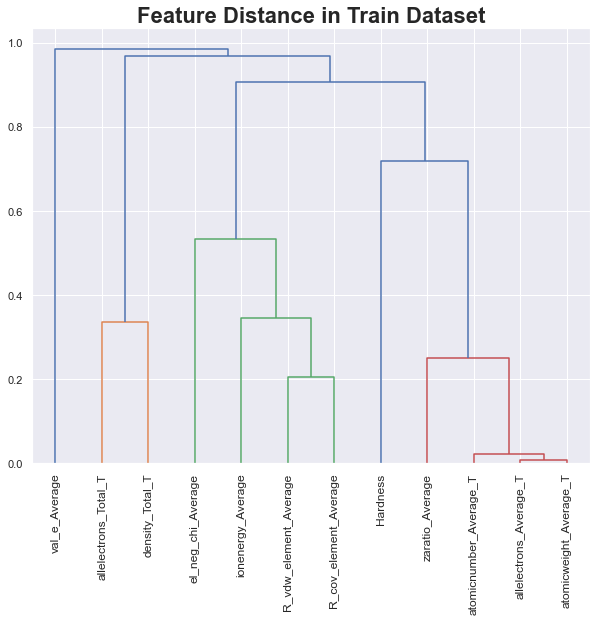

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

distance(transforms.drop(['id'], axis=1), 'Train')

The next thing we should consider is binning. There are currently 49 values that the hardness can be set to. 

In [125]:
len(transforms.Hardness.value_counts())

49

In [126]:
transforms.Hardness.value_counts()

6.00     2053
5.50     1452
2.50     1051
3.80      704
5.80      401
6.50      392
2.00      377
5.00      375
4.00      364
2.80      360
3.00      304
2.30      291
6.30      265
3.50      253
6.80      239
1.80      157
3.30      144
5.30      134
4.30      130
1.50      126
4.80      104
7.50       98
7.00       96
4.50       92
7.80       64
9.00       33
10.00      30
9.50       25
1.30       17
8.50       15
8.00       12
6.20       10
5.75       10
7.30       10
8.10        6
2.90        5
1.00        2
8.30        1
5.40        1
6.70        1
2.60        1
3.60        1
2.10        1
2.20        1
3.20        1
4.10        1
6.40        1
9.80        1
6.64        1
Name: Hardness, dtype: int64

In [136]:
# Just testing out the cleaned data with the current model

from sklearn.model_selection import train_test_split

import seaborn as sns
# import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error

# 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_validate, train_test_split
import numpy as np



In [178]:
X = transforms.drop(['Hardness', 'atomicnumber_Average_T', 'allelectrons_Total_T', 'atomicweight_Average_T', 'zaratio_Average'], axis=1)
y = transforms.Hardness

In [179]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [180]:
basic_forest_model = RandomForestRegressor(n_estimators=920,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=19,
    random_state=26)
basic_forest_model.fit(X_train, y_train) 
xg_predictions_final = basic_forest_model.predict(X_valid)

print("Generated Test Data Predictions using Final Model:\n", 
                                                  xg_predictions_final)

Generated Test Data Predictions using Final Model:
 [3.91730742 5.68637716 5.16102029 ... 5.71496518 5.79228805 5.7647441 ]


In [175]:
output = pd.DataFrame({'id': X_valid.id,
                       'Predicted Hardness': xg_predictions_final, 
                       'Actual Hardness': y_valid})

In [181]:
medae = median_absolute_error(xg_predictions_final, y_valid)

In [182]:
medae

0.6582187793459475

In [146]:
output

,id,Predicted Hardness,Actual Hardness
7782,7782,3.652690,5.5
1501,1501,5.733693,5.5
9588,9588,4.908968,2.0
8751,8751,4.994880,6.5
4215,4215,5.862477,7.5
...,...,...,...
10289,10289,3.656839,5.5
7569,7569,4.458177,5.5
8981,8981,5.791921,6.8
4985,4985,5.781785,6.3


In [188]:
X = full_train.drop(['Hardness', 'allelectrons_Total', 'atomicweight_Average', 'zaratio_Average'], axis=1)
y = full_train.Hardness

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [189]:
basic_forest_model = RandomForestRegressor(n_estimators=920,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=19,
    random_state=26)
basic_forest_model.fit(X_train, y_train) 
xg_predictions_final2 = basic_forest_model.predict(X_valid)

print("Generated Test Data Predictions using Final Model:\n", 
                                                  xg_predictions_final2)

Generated Test Data Predictions using Final Model:
 [4.10671183 5.60750303 4.46812807 ... 2.31420743 5.85284124 4.74047359]


In [190]:
median_absolute_error(xg_predictions_final2, y_valid)

0.6656016816243262

In [151]:
from Rock_Cleaner import rock_cleaner

Train = rock_cleaner(full_train)


In [160]:
X_train = Train.drop('Hardness', axis=1)
y_train = Train.Hardness


In [161]:
basic_forest_model = RandomForestRegressor(n_estimators=920,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=19,
    random_state=26)
basic_forest_model.fit(X_train, y_train) 
xg_predictions_final = basic_forest_model.predict(full_test)

print("Generated Test Data Predictions using Final Model:\n", 
                                                  xg_predictions_final)

Generated Test Data Predictions using Final Model:
 [5.22106763 3.68405005 3.43618925 ... 3.43585954 3.43706969 5.2914939 ]


c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- allelectrons_Average
- allelectrons_Total
- atomicweight_Average
- density_Average
- density_Total
Feature names seen at fit time, yet now missing:
- allelectrons_Average_T
- allelectrons_Total_T
- atomicnumber_Average_T
- atomicweight_Average_T
- density_Total_T

  warnings.warn(message, FutureWarning)


And now to test the dirty data

In [183]:
X_train = full_train.drop('Hardness', axis=1)
y_train = full_train.Hardness

In [184]:
basic_forest_model = RandomForestRegressor(n_estimators=920,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=19,
    random_state=26)
basic_forest_model.fit(X_train, y_train) 
xg_predictions_final2 = basic_forest_model.predict(full_test)

print("Generated Test Data Predictions using Final Model:\n", 
                                                  xg_predictions_final2)

Generated Test Data Predictions using Final Model:
 [3.28375121 3.3183685  5.92876507 ... 5.32642501 5.11776717 3.0147045 ]


ValueError: Found input variables with inconsistent numbers of samples: [6939, 2043]

In [164]:
output = pd.DataFrame({'id': full_test.id
                       , 'Clean Predicted Hardness': xg_predictions_final
                       , 'Dirty Predicted Hardness': xg_predictions_final2})

In [165]:
output

,id,Clean Predicted Hardness,Dirty Predicted Hardness
0,10407,5.221068,3.283751
1,10408,3.684050,3.318369
2,10409,3.436189,5.928765
3,10410,3.645995,4.397067
4,10411,3.428314,5.073976
...,...,...,...
6934,17341,4.989326,5.729988
6935,17342,3.587961,4.131253
6936,17343,3.435860,5.326425
6937,17344,3.437070,5.117767


Next Question: How to program in the Median Absolute Error?